# Exploratory analysis of bach dataset

In [1]:
# Uncomment the line below and run this cell to get your data from github into colab (only runnable in colab, not ordinary jupyter notebook):
! git clone https://github.com/lkriener/music_generation.git && mv music_generation/* . && rm music_generation -r

Cloning into 'music_generation'...
remote: Enumerating objects: 449, done.
remote: Counting objects: 100% (449/449), done.
remote: Compressing objects: 100% (421/421), done.
remote: Total 449 (delta 38), reused 430 (delta 22), pack-reused 0
Receiving objects: 100% (449/449), 336.89 KiB | 4.32 MiB/s, done.
Resolving deltas: 100% (38/38), done.


In [2]:
# Uncomment line to install requirements
! pip install -r colab_requirements.txt

In [3]:
import src.midi_utils as midi_utils

import pygame

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [0]:
midi_filename = 'data/raw/bwv104.6.mid'
# midi_filename = 'data/raw/pkgsc_azalea.mid'
pygame.init()
pygame.mixer.music.load(midi_filename)
pygame.mixer.music.play()

error: ignored

In [0]:
pygame.mixer.music.stop()

In [0]:
def get_track_name(track_string):
  """
  Get the name of a track.
  """
  for line in track_string:
    split_line = [x.strip() for x in line.split(',')]
    if split_line[2] == 'Title_t':
      return split_line[3]


In [12]:
# check if first track of bach is usually soprano
from src.dataset_utils import TrackDataset, get_dataset_representation_from_tracks

tracks = []
# iterate over all midi files of folder
import glob
import os
import numpy as np

try:
    home_dir
except NameError:
    home_dir = os.getcwd()

os.chdir(home_dir + "/data/raw/bach")  # go to a folder relative to home dir
for midi_file in glob.glob("*.mid"):
    # get a list of all soprano tracks
    ## load midi file
    csv_text = midi_utils.load_to_csv(midi_file)

    ## Split into tracks
    track_dict = midi_utils.split_tracks(csv_text)
    track_nr = '1'
    
    # find track name
    tracks.append(get_track_name(track_dict[track_nr]))

    
print(set(tracks)) # All types of names


{'"S."', '"Soprano"'}


# Read songs into pandas

In [13]:
from src.dataset_utils import TrackDataset, get_dataset_representation_from_tracks

tracks = []
# iterate over all midi files of folder
import glob
import os
import numpy as np
import pandas as pd

song_names = []
pitches = []
lengths = []

try:
    home_dir
except NameError:
    home_dir = os.getcwd()

os.chdir(home_dir + "/data/raw/bach")  # go to a folder relative to home dir
for midi_file in glob.glob("*.mid"):
    # get a list of all soprano tracks
    ## load midi file
    csv_text = midi_utils.load_to_csv(midi_file)

    ## Split into tracks
    track_dict = midi_utils.split_tracks(csv_text)
    
    track_nr = '1' # soprano track for bach
    track_dict[track_nr]

    ## Generating numpy array with notes
    track = midi_utils.midi_track_to_numpy(track_dict[track_nr])
    
    for note in track:
      song_names.append(midi_file) # store midi file
      pitches.append(note[0]) # store pitch
      lengths.append(note[1]) # store length
    
notes_df = pd.DataFrame({"song names": song_names,
                         "pitches": pitches,
                         "lengths": lengths})

len(notes_df)



21131

In [14]:
notes_df.describe()

,pitches,lengths
count,21131.000000,21131.000000
mean,70.512423,1089.953528
std,3.557435,564.023407
min,60.000000,128.000000
25%,69.000000,1024.000000
50%,71.000000,1024.000000
75%,73.000000,1024.000000
max,81.000000,16384.000000


Text(0, 0.5, 'Occurrence')

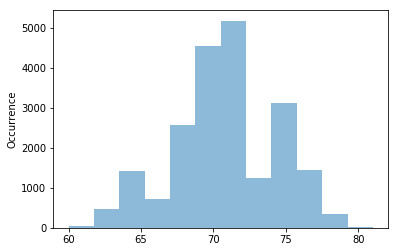

In [37]:
ax = notes_df['pitches'].plot.hist(bins=12, alpha=0.5)
ax.set_ylabel("Occurrence")

Text(0.5, 0, 'Log2(note length)')

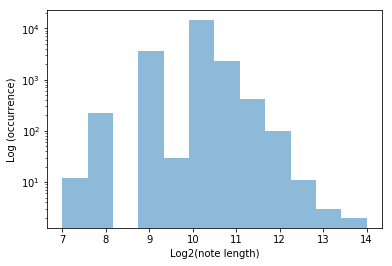

In [36]:
ax = notes_df['lengths'].apply(lambda x: np.log2(x)).plot.hist(bins=12, alpha=0.5)
ax.set_yscale('log')
ax.set_ylabel("Log (occurrence)")
ax.set_xlabel("Log2(note length)")

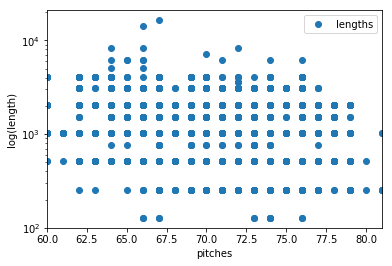

In [43]:
ax = notes_df.plot(x='pitches', y='lengths', style='o')
ax.set_ylabel("log(length)")
ax.set_yscale("log")

In [45]:
notes_df.head(10)

,song names,pitches,lengths
0,bwv284.mid,72,1024
1,bwv284.mid,67,1024
2,bwv284.mid,69,1024
3,bwv284.mid,71,1024
4,bwv284.mid,72,2048
5,bwv284.mid,72,1024
6,bwv284.mid,67,1024
7,bwv284.mid,72,1024
8,bwv284.mid,70,1024
9,bwv284.mid,69,2048


In [81]:
os.chdir(home_dir)
midi_note_df = pd.read_csv("data/auxiliary/midi-notes.csv")
midi_note_df.head(10)

,Unnamed: 0,MIDI note number,Key number (Organ),Key number (Piano),Note names (English),Note names (German),Frequency (Equal tuning at 440 Hz),Simple Note names (English)
0,0,128,,,G#9/Ab9,gis’’’’’’/ges’’’’’’,13289.75,G#9
1,1,127,,,G9,g’’’’’’,12543.85,G9
2,2,126,,,F#9/Gb9,fis’’’’’’/ges’’’’’’,11839.82,F#9
3,3,125,,,F9,f’’’’’’,11175.30,F9
4,4,124,,,E9,e’’’’’’,10548.08,E9
5,5,123,,,D#9/Eb9,dis’’’’’’/es’’’’’’,9956.06,D#9
6,6,122,,,D9,d’’’’’’,9397.27,D9
7,7,121,,,C#9/Db9,cis’’’’’’/des’’’’’’,8869.84,C#9
8,8,120,,,C9,c’’’’’’,8372.02,C9
9,9,119,,,B8,h’’’’’,7902.13,B8


In [88]:
# get proper note names for the MIDI note numbers
note_name_df = pd.merge(notes_df, midi_note_df[['MIDI note number', 'Simple Note names (English)']], how='left', left_on='pitches', right_on='MIDI note number')
note_name_df.drop(columns=['MIDI note number'], inplace=True)
note_name_df.head(10)

,song names,pitches,lengths,Simple Note names (English)
0,bwv284.mid,72,1024,C5
1,bwv284.mid,67,1024,G4
2,bwv284.mid,69,1024,A4
3,bwv284.mid,71,1024,B4
4,bwv284.mid,72,2048,C5
5,bwv284.mid,72,1024,C5
6,bwv284.mid,67,1024,G4
7,bwv284.mid,72,1024,C5
8,bwv284.mid,70,1024,A#4
9,bwv284.mid,69,2048,A4
